In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from util import parse_ingredient_list
from itertools import chain

In [2]:
# load one of the datasets to look at
file_name = "recipes_raw_nosource_ar"
df = pd.read_json("data/"+file_name+".json")
df.head()

,rmK12Uau.ntP510KeImX506H6Mr6jTu,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,kq.naD.8G19M4UU9dVvJgHtpfo.l/eC,lYrgWNn00EXblOupzM3tL0jGr9O0CB2,Fu0DgGYFUGwc0BBlN6r20o/ihOVs5bO,MBRNtqELRRuv8zJH4k7Aba2bmIc2A3C,ZPyPoMiNvgAfrKcRpH9FEYV/XsPZBsW,...,uHHb42/tuIKsmN5U6l9AD.FdVpSFxs6,IPAeN3L6rm2oughJpUhbG038k.ACJ0K,3UIhlTQFH5jyIaHN8zeKlK5V.94Kjwu,PdBxkE2gnI/.ynokkp1Hu1KLGZnGdei,SB46Udqc5Svsi70S1qRmRLv5tlg8Oca,gehEOcDPtU3SmNSXrwWwWD4ulPpUdMO,VRAsyF.1xMBYqAVKX1biyIORH6N6qzy,Lf8/u.0k2029QMSQFrHS4gRsvKOQFUG,ay.AqX/9ysBtWHcnHoDeGAyJ5Orla8e,2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
title,Slow Cooker Chicken and Dumplings,Awesome Slow Cooker Pot Roast,Brown Sugar Meatloaf,Best Chocolate Chip Cookies,Homemade Mac and Cheese Casserole,Banana Banana Bread,Chef John's Fisherman's Pie,Mom's Zucchini Bread,The Best Rolled Sugar Cookies,Singapore Chili Crabs,...,Citrus Creme Brulee,Honey Nutty Granola,Salmon en Croute,Homemade Blender Butter,Gluten Free Chicken Noodle Soup,Thai-Indian Veggie Soup,Coconut Milk-Free Panang Curry Chicken,Cooked Cold Salad,Easy Eggnog Creme Brulee,Super Power Stovetop Granola
ingredients,"[4 skinless, boneless chicken breast halves, 2...",[2 (10.75 ounce) cans condensed cream of mushr...,"[1/2 cup packed brown sugar, 1/2 cup ketchup, ...","[1 cup butter, softened, 1 cup white sugar, 1 ...","[8 ounces whole wheat rotini pasta, 3 cups fre...","[2 cups all-purpose flour, 1 teaspoon baking s...","[For potato crust:, 3 russet potatoes, peeled ...","[3 cups all-purpose flour, 1 teaspoon salt, 1 ...","[1 1/2 cups butter, softened, 2 cups white sug...","[Sauce:, 1/2 cup ketchup, 1/2 cup chicken brot...",...,"[2 oranges, juiced, lemon, juiced, 1 lime, jui...","[3 cups rolled oats, 1 1/2 cups toasted almond...","[1 cup watercress, or as desired, 1/2 lemon, z...","[2 pints heavy whipping cream, salt to taste]",[1/2 (12 ounce) box Barilla® Gluten Free Elbow...,"[2 teaspoons olive oil, 1/4 cup minced fresh g...","[2 cups light cream, 1/4 teaspoon coconut extr...","[3 tablespoons bacon grease, 2 cups shredded B...","[4 egg yolks, 1 tablespoon white sugar, 1 cup ...","[1/4 cup canola oil, 3 cups quick-cooking oats..."
instructions,"Place the chicken, butter, soup, and onion in ...","In a slow cooker, mix cream of mushroom soup, ...",Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F. Line a 2-quart ...,Preheat oven to 350 degrees F (175 degrees C)....,Bring a large saucepan of salted water and to ...,Grease and flour two 8 x 4 inch pans. Preheat ...,"In a large bowl, cream together butter and sug...","Whisk ketchup, chicken broth, egg, soy sauce, ...",...,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 375 degrees F (190 degrees C)....,Pour cream into a blender. Cover and blend unt...,Saute onions in olive oil over medium heat unt...,Heat oil in a large pot over medium heat. Add ...,Heat cream and coconut extract in a skillet or...,Heat bacon grease in a skillet over medium-hig...,Preheat oven to 350 degrees F (175 degrees C)....,Heat 1/4 cup canola oil in large skillet over ...
picture_link,55lznCYBbs2mT8BTx6BTkLhynGHzM.S,QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,YCnbhplMgiraW4rUXcybgSEZinSgljm,jRnWGDXDdyOg3rta4/HVAR2rD19XubC,aUca10AaD8T2yYvcLOgH/UJlR5/OhOe,YdgEVyLVffZgh9NZPN3Eqj6MaX8KdzK,UrgvDGu4roLiho160fTVIwCUrGZna8i,OFp6yXFwzlrkMQ5STffYPllxQvMVLUS,...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cWEzUSv9Ozr3b4MxNVCqJYgTjIS.kHm,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa


In [3]:
# For the moment we are not interested in the instructions or picture_link
df.drop(["instructions", "picture_link"], inplace=True)
df.head()

,rmK12Uau.ntP510KeImX506H6Mr6jTu,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,kq.naD.8G19M4UU9dVvJgHtpfo.l/eC,lYrgWNn00EXblOupzM3tL0jGr9O0CB2,Fu0DgGYFUGwc0BBlN6r20o/ihOVs5bO,MBRNtqELRRuv8zJH4k7Aba2bmIc2A3C,ZPyPoMiNvgAfrKcRpH9FEYV/XsPZBsW,...,uHHb42/tuIKsmN5U6l9AD.FdVpSFxs6,IPAeN3L6rm2oughJpUhbG038k.ACJ0K,3UIhlTQFH5jyIaHN8zeKlK5V.94Kjwu,PdBxkE2gnI/.ynokkp1Hu1KLGZnGdei,SB46Udqc5Svsi70S1qRmRLv5tlg8Oca,gehEOcDPtU3SmNSXrwWwWD4ulPpUdMO,VRAsyF.1xMBYqAVKX1biyIORH6N6qzy,Lf8/u.0k2029QMSQFrHS4gRsvKOQFUG,ay.AqX/9ysBtWHcnHoDeGAyJ5Orla8e,2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
title,Slow Cooker Chicken and Dumplings,Awesome Slow Cooker Pot Roast,Brown Sugar Meatloaf,Best Chocolate Chip Cookies,Homemade Mac and Cheese Casserole,Banana Banana Bread,Chef John's Fisherman's Pie,Mom's Zucchini Bread,The Best Rolled Sugar Cookies,Singapore Chili Crabs,...,Citrus Creme Brulee,Honey Nutty Granola,Salmon en Croute,Homemade Blender Butter,Gluten Free Chicken Noodle Soup,Thai-Indian Veggie Soup,Coconut Milk-Free Panang Curry Chicken,Cooked Cold Salad,Easy Eggnog Creme Brulee,Super Power Stovetop Granola
ingredients,"[4 skinless, boneless chicken breast halves, 2...",[2 (10.75 ounce) cans condensed cream of mushr...,"[1/2 cup packed brown sugar, 1/2 cup ketchup, ...","[1 cup butter, softened, 1 cup white sugar, 1 ...","[8 ounces whole wheat rotini pasta, 3 cups fre...","[2 cups all-purpose flour, 1 teaspoon baking s...","[For potato crust:, 3 russet potatoes, peeled ...","[3 cups all-purpose flour, 1 teaspoon salt, 1 ...","[1 1/2 cups butter, softened, 2 cups white sug...","[Sauce:, 1/2 cup ketchup, 1/2 cup chicken brot...",...,"[2 oranges, juiced, lemon, juiced, 1 lime, jui...","[3 cups rolled oats, 1 1/2 cups toasted almond...","[1 cup watercress, or as desired, 1/2 lemon, z...","[2 pints heavy whipping cream, salt to taste]",[1/2 (12 ounce) box Barilla® Gluten Free Elbow...,"[2 teaspoons olive oil, 1/4 cup minced fresh g...","[2 cups light cream, 1/4 teaspoon coconut extr...","[3 tablespoons bacon grease, 2 cups shredded B...","[4 egg yolks, 1 tablespoon white sugar, 1 cup ...","[1/4 cup canola oil, 3 cups quick-cooking oats..."


In [4]:
# Select a subset of data to look at, we transpose the original data frame
# so we can select all the values in a column at once.
df_trans = df.transpose()
# drop the recipes that have NaN for their ingredients
df_trans = df_trans[df_trans.ingredients.notnull()]

In [5]:
# We want a new dataframe where rows are an ingredient in a recipe
# and columns are information about the ingredient
# amount, units, descriptions, etc.
# This is an intermediate dataframe, in theory we don't need it
# but this lets us analyze the ingredients better for parsing

# The parse_ingredient_list function only takes a single list as an
# argument, but we can take advantage of numpy's vectorize to let it
# take a list of lists as on argument, and return a list of dicts for
# each element in the input list. This was a significant speedup.
vfunc = np.vectorize(parse_ingredient_list)

# Using .values gets a list of values (instead of single column data frame),
# working with this list is faster than the dataframe and was another
# performance increase. Also the return from vfunc is a list of list
# of dicts which we need to unpack into a single list of dicts for
# pandas to makea dataframe from it, so we use chain.from_iterable.
ingredient_df = pd.DataFrame(
    list(
        chain.from_iterable(
            vfunc(
                df_trans.index.values,
                df_trans.title.values,
                df_trans["ingredients"].values,
            )
        )
    )
)

# make the index column the actual index of the dataframe, each index is
# a unique recipe
ingredient_df.set_index("index", inplace=True)
ingredient_df.head(10)

Parsing error with:  7q6XmQJnbFZ9/NOynwpTfXx4JeOo99m Stuffed Acorn Squash II
Parsing error with:  dHcijU3BNG/YMHWlJGf5J3uQP26wbaq Authentic South Indian Biryani
Parsing error with:  dHcijU3BNG/YMHWlJGf5J3uQP26wbaq Authentic South Indian Biryani
Parsing error with:  UfWG1YvUr7ImAK..j6XAPAmbAFsa9Za Tomato Aspic
Parsing error with:  UfWG1YvUr7ImAK..j6XAPAmbAFsa9Za Tomato Aspic
Parsing error with:  FeVBDsI4XuwPm1XAlevuUp8Edpxtcsm Makhani Murgh (Butter Chicken)
Parsing error with:  YQWICC6V8J0EchA/fz3wMSyWLL1Q3IS Asian Chicken Salad in a Jar
Parsing error with:  YQWICC6V8J0EchA/fz3wMSyWLL1Q3IS Asian Chicken Salad in a Jar
Parsing error with:  CqO2OlaeolQUdtCyGpZt6IBfMomY8Ka Malaysian Tomato Rice 
Parsing error with:  CqO2OlaeolQUdtCyGpZt6IBfMomY8Ka Malaysian Tomato Rice 
Parsing error with:  AyT1FJ5/WN5Ga5J9rX/TCvA13DIKnAW Sweet and Spicy Cranberry Chutney
Parsing error with:  AyT1FJ5/WN5Ga5J9rX/TCvA13DIKnAW Sweet and Spicy Cranberry Chutney


,title,descriptions,unit,amount,ingredient
index,,,,,
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[skinless, boneless]",halves,4.00,chicken breast
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,[],tablespoons,2.00,butter
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,[condensed],ounces,21.50,cream of chicken soup
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,[finely diced],,1.00,onion
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[into pieces, refrigerated, torn]",ounces,20.00,biscuit dough
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[condensed],ounces,21.50,cream of mushroom soup
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[dry],ounces,1.00,onion soup mix
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[],cups,1.25,water
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[],pounds,5.50,pot roast


In [6]:
# Now we convert as many units as possible to metric
ingredient_df.loc[ingredient_df.unit == "pounds", "amount"] *= 453.592
ingredient_df.loc[ingredient_df.unit == "pounds", "unit"] = "grams"

ingredient_df.loc[ingredient_df.unit == "teaspoons", "amount"] *= 4.92892
ingredient_df.loc[ingredient_df.unit == "teaspoons", "unit"] = "milliliters"

ingredient_df.loc[ingredient_df.unit == "tablespoons", "amount"] *= 14.7868
ingredient_df.loc[ingredient_df.unit == "tablespoons", "unit"] = "milliliters"

ingredient_df.loc[ingredient_df.unit == "cups", "amount"] *= 236.588
ingredient_df.loc[ingredient_df.unit == "cups", "unit"] = "milliliters"

ingredient_df.loc[ingredient_df.unit == "pinches", "amount"] *= 4.92892 * (1 / 16)
ingredient_df.loc[ingredient_df.unit == "pinches", "unit"] = "milliliters"

ingredient_df.loc[ingredient_df.unit == "dashes", "amount"] *= 4.92892 * (1 / 8)
ingredient_df.loc[ingredient_df.unit == "dashes", "unit"] = "milliliters"

ingredient_df.loc[ingredient_df.unit == "ounces", "amount"] *= 28.3495
ingredient_df.loc[ingredient_df.unit == "ounces", "unit"] = "grams"

ingredient_df.loc[ingredient_df.unit == "fluid_ounces", "amount"] *= 29.5735
ingredient_df.loc[ingredient_df.unit == "fluid_ounces", "unit"] = "milliliters"

ingredient_df.loc[ingredient_df.unit == "pints", "amount"] *= 473.176
ingredient_df.loc[ingredient_df.unit == "pints", "unit"] = "milliliters"

ingredient_df.loc[ingredient_df.unit == "quarts", "amount"] *= 946.353
ingredient_df.loc[ingredient_df.unit == "quarts", "unit"] = "milliliters"

ingredient_df.loc[ingredient_df.unit == "liters", "amount"] *= 1000
ingredient_df.loc[ingredient_df.unit == "liters", "unit"] = "milliliters"

ingredient_df.loc[ingredient_df.unit == "gallons", "amount"] *= 3785.41
ingredient_df.loc[ingredient_df.unit == "gallons", "unit"] = "milliliters"

ingredient_df.loc[ingredient_df.unit == "drops", "amount"] *= 0.05
ingredient_df.loc[ingredient_df.unit == "drops", "unit"] = "milliliters"

ingredient_df.head(10)

,title,descriptions,unit,amount,ingredient
index,,,,,
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[skinless, boneless]",halves,4.00000,chicken breast
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,[],milliliters,29.57360,butter
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,[condensed],grams,609.51425,cream of chicken soup
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,[finely diced],,1.00000,onion
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[into pieces, refrigerated, torn]",grams,566.99000,biscuit dough
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[condensed],grams,609.51425,cream of mushroom soup
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[dry],grams,28.34950,onion soup mix
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[],milliliters,295.73500,water
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[],grams,2494.75600,pot roast


In [7]:
# Now we can explore the results of our parsing
print("Unique units of measurement:\n", ingredient_df.unit.unique())
print("Number of unique ingredients: ", len(ingredient_df.ingredient.unique()))
ingredient_df.ingredient.unique()
temp_df = ingredient_df[ingredient_df.ingredient.str.contains("honey")]
temp_df.ingredient.unique()

Unique units of measurement:
 ['halves' 'milliliters' 'grams' '' 'cloves' 'leaves' 'recipes' 'heads'
 'bunches' 'slices' 'thighs' 'stalks' 'cubes' 'fillets' 'packets' 'inches'
 'sprigs' 'packages' 'bags' 'pieces' 'loaves' 'strips' 'bulbs' 'envelopes'
 'links' 'legs' 'boxes' 'bottles' 'trays' 'scoops' 'layers' 'jars'
 'squares' 'cans' 'bars' 'cakes' None 'containers']
Number of unique ingredients:  15124


array(['honey', 'honey mustard dressing', 'dijon honey mustard',
       'honey mustard', 'honey barbeque sauce', 'honey almonds',
       'honey slightly', 'honey barbecue sauce', 'clover honey',
       'orange blossom honey', 'of honey cured deli ham', 'avocado honey',
       'honey graham cereal', 'honey ham', 'honey mustard barbecue sauce',
       'tupelo honey', 'honey nut flavor cornflakes cereal',
       'wildflower honey', 'honey cured deli ham', 'honey garlic sauce',
       'honey teriyaki sauce', 'honey flavored bacon', 'honeycomb tripe',
       'honeydew melon', 'honey peanuts', 'honey Dijon dressing',
       'honey mustard onion pretzels',
       'granulated sugar sugar substitute or honey', 'thyme honey',
       'honeydew', 'honey garlic barbecue sauce',
       'honeydew melon balls or cubes', 'agave nectar or honey',
       'honey flavored barbeque sauce', 'honey graham crackers',
       'honey flavored butter', 'honey Dijon mustard',
       'honey hickory barbeque sauce', 

In [8]:
# Now we make the real DataFrame that we will do most of our work with.
# In theory this should have worked with .pivot instead of .pivot_table,
# but it didn't. This makes me think there is a bug somewhere in how
# the recipes are being parsed but I will look into that later
# FYI this will take several minutes
recipe_df = ingredient_df.pivot_table(
    index="index", columns="ingredient", values="amount", aggfunc=np.mean
)
recipe_df.fillna(0, inplace=True)
recipe_df.head(10)

ingredient,,'bouqet garni' spice balls,1% cottage cheese,1% low fat milk,1% milk,1/3 less fat cream cheese,1/3 less fat or regular cream cheese,10 pie crust,100 proof bourbon,100 proof vodka,...,zucchini squash,zucchini squashes,zucchini steamed,zucchini very,zucchinis,zucchinis 1/4 lengthwise,zucchinis ends,zucchinis lengthwise,zwieback cracker,zwieback toast
index,,,,,,,,,,,,,,,,,,,,,
../AFIrLizRK7C5isREQ0hUdXoNXTpS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
..3M3xsVPQLnncQ2oYzCyhGjNe/6EB2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
..64QbeV22IrPuRAdLu4zscfAjsaFaK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
..6gl/0GIzSugrbvy6kHyxEHMMP4h9K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
..B3IS4KrEGWH7o13lvV9nQSe9a4u36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
..G2iuRLT7oseNmkKbjqAgbdB1G5IBC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
..M776r8BHroHcCXw3vInfs25LDkWw2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
..VDFobAHiAa0127h.N784Y2pnZyBZK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
..hYtxdDoy5Rp..pLgIj2mKKfvp1jPa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Let's save our dataframe so we can look at it without having to reload and recompute everything later.
# pickle is much faster than csv
recipe_df.to_pickle("data/"+file_name+"_parsed.pickle")

In [9]:
# Here we compute the t-SNE
# WARNING: THIS TAKES A LONG TIME FOR LARGE DATAFRAMES
data = recipe_df[recipe_df.columns].values
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000)
tsne_results = tsne.fit_transform(data)
print("tsne done")
recipe_df["tsne-2d-one"] = tsne_results[:, 0]
recipe_df["tsne-2d-two"] = tsne_results[:, 1]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.272s...
[t-SNE] Computed neighbors for 3000 samples in 24.280s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 37.224878
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.406158
[t-SNE] KL divergence after 5000 iterations: 1.155641
tsne done


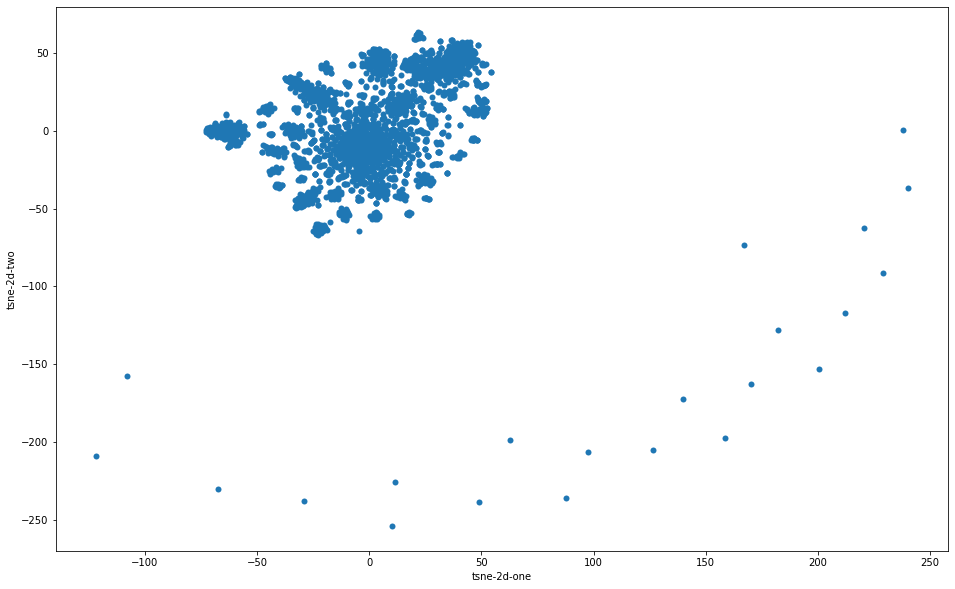

In [10]:
# plot the t-SNE
plt.figure(figsize=(16, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", data=recipe_df, linewidth=0)
plt.show()

In [27]:
# Here I'm just exploring outliers in the t-SNE
sample_df = recipe_df.loc[recipe_df["tsne-2d-two"] <= -100]
drop_cols = sample_df.columns[(sample_df == 0).sum() == sample_df.shape[0]]
sample_df.drop(drop_cols, axis=1, inplace=True)
sample_df.columns.unique()


Index(['Golden Delicious apple', 'Italian bread',
       'Mexican cheese blend or more to taste', 'Parmesan cheese',
       'Romano cheese', 'all purpose apples', 'all purpose flour',
       'apple cider vinegar', 'baby back ribs', 'baking powder',
       ...
       'watermelon', 'whipped topping', 'white bread', 'white bread cubes',
       'white peaches', 'white sugar', 'white wine', 'whole wheat bread',
       'tsne-2d-one', 'tsne-2d-two'],
      dtype='object', name='ingredient', length=118)